# Question 2: ANN
- Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between 'bad' connections, called intrusions or attacks, and 'good' normal connections.
- Read more: https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data
- Requirement:
  + Use KDD dataset (kddcup.data.gz) to try to classify a connection as 'normal.' or others.
  + Make a new prediction for each sample in KDD test dataset (kddcup.testdata.unlabeled.gz).

# 0. Mount drive & Import packages

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question2_ANN'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question2_ANN


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load data & Pre-processing

In [5]:
df = pd.read_csv('Dataset/kddcup.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.shape

(4898431, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       int64  
 1   1       object 
 2   2       object 
 3   3       object 
 4   4       int64  
 5   5       int64  
 6   6       int64  
 7   7       int64  
 8   8       int64  
 9   9       int64  
 10  10      int64  
 11  11      int64  
 12  12      int64  
 13  13      int64  
 14  14      int64  
 15  15      int64  
 16  16      int64  
 17  17      int64  
 18  18      int64  
 19  19      int64  
 20  20      int64  
 21  21      int64  
 22  22      int64  
 23  23      int64  
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      int64  
 32  32      int64  
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [8]:
# Kiểm tra duplicated row & drop 
print('No of duplicated row: ', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print('New df.shape:',df.shape)

No of duplicated row:  3823439
New df.shape: (1074992, 42)


In [9]:
for i  in  df.columns:
  print(i, len(df.iloc[:,i].unique()))

0 9883
1 3
2 70
3 11
4 7195
5 21493
6 2
7 3
8 6
9 30
10 6
11 2
12 98
13 2
14 3
15 93
16 42
17 3
18 10
19 1
20 2
21 2
22 512
23 512
24 96
25 87
26 89
27 76
28 101
29 95
30 72
31 256
32 256
33 101
34 101
35 101
36 76
37 101
38 100
39 101
40 101
41 23


In [10]:
# cột 0,4,5 vì các giá trị unique
df = df.drop([0,4,5], axis=1)
df.head()

,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,tcp,http,SF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,tcp,http,SF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,tcp,http,SF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,tcp,http,SF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,tcp,http,SF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074992 entries, 0 to 1074991
Data columns (total 39 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   1       1074992 non-null  object 
 1   2       1074992 non-null  object 
 2   3       1074992 non-null  object 
 3   6       1074992 non-null  int64  
 4   7       1074992 non-null  int64  
 5   8       1074992 non-null  int64  
 6   9       1074992 non-null  int64  
 7   10      1074992 non-null  int64  
 8   11      1074992 non-null  int64  
 9   12      1074992 non-null  int64  
 10  13      1074992 non-null  int64  
 11  14      1074992 non-null  int64  
 12  15      1074992 non-null  int64  
 13  16      1074992 non-null  int64  
 14  17      1074992 non-null  int64  
 15  18      1074992 non-null  int64  
 16  19      1074992 non-null  int64  
 17  20      1074992 non-null  int64  
 18  21      1074992 non-null  int64  
 19  22      1074992 non-null  int64  
 20  23      1074992 non-null

In [12]:
df.loc[:,41].value_counts()

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: 41, dtype: int64

### Nhận xét:    
- Vì đa phần dữ liệu thuộc về 2 lớp 'normal.' và 'neptune.' nên ta sẽ chia dữ liệu thành 3 class 'normal.', 'neptune.' và phần còn lại 'other'

In [13]:
# Label Encoder output thành 3 lớp: 'normal.':0, 'neptune.':1, 'other': 2
df.loc[:,41] = df.loc[:,41].apply(lambda x: 0 if x=='normal.' else (1 if x=='neptune.' else 2))

In [14]:
df.loc[:,41].value_counts()

0    812814
1    242149
2     20029
Name: 41, dtype: int64

In [15]:
# Tạo pipeline để OHE các biến categorical 0,1,2 & Scaler các biến numeric  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ohe_X = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(handle_unknown="ignore"), [0,1,2])],
        remainder='passthrough'
    )

pipeline = Pipeline(steps = [("ohe_X", ohe_X), 
                             ("scaler", StandardScaler())]
                    )     

In [24]:
# Split into input & output
X = df.drop(41, axis=1).values
y = df.iloc[:,38]

In [25]:
# Fit & transform pipeline
pipeline.fit(X.tolist())
X = pipeline.transform(X.tolist())

In [37]:
# X[:1]

In [27]:
y = to_categorical(y)

In [28]:
X.shape, y.shape 

((1074992, 119), (1074992, 3))

In [29]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# 2. Build model

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = keras.Sequential()
# the hidden layers
model.add(layers.Dense(units=60, input_shape=(119,), activation='relu'))
model.add(layers.Dense(units=60, activation='relu'))

# the output layers
model.add(layers.Dense(units=3,activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                7200      
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 3)                 183       
                                                                 
Total params: 11,043
Trainable params: 11,043
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Early Stopping
early_stopping = EarlyStopping(monitor="val_loss",patience=10
                               , min_delta=0.01,  restore_best_weights=True)

In [36]:
# Fit model w EarlyStopping
history = model.fit(X_train, y_train, 
                    validation_data=(X_test,y_test), 
                    batch_size=32, #default=32
                    epochs=100,
                    callbacks=[early_stopping], 
                    verbose=1) 

Epoch 1/100
23516/23516 [==============================] - 124s 5ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0050 - val_accuracy: 0.9988
Epoch 2/100
23516/23516 [==============================] - 121s 5ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 3/100
23516/23516 [==============================] - 119s 5ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 4/100
23516/23516 [==============================] - 119s 5ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 5/100
23516/23516 [==============================] - 121s 5ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 6/100
23516/23516 [==============================] - 118s 5ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 7/100
23516/23516 [==============================] - 135s 6ms/step - loss: 0.0046 - accuracy: 0.9993

In [38]:
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
6,0.004602,0.999262,0.005274,0.999175
7,0.002756,0.999257,0.005977,0.998812
8,0.003471,0.999290,0.006331,0.999215
9,0.002854,0.999272,0.006598,0.999225
10,0.003784,0.999297,0.009325,0.999296


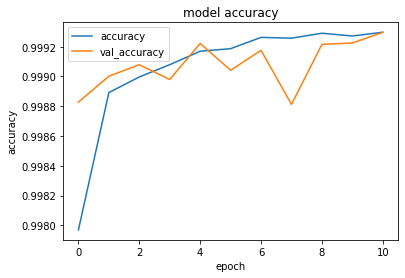

Maximum validation loss: 0.9992961287498474


In [39]:
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
print('Maximum validation loss: {}'.format(history_df['val_accuracy'].max()))

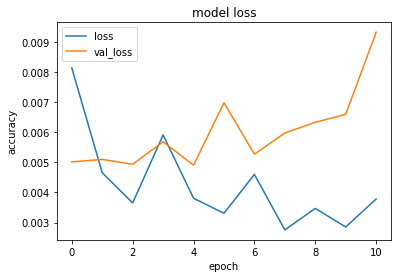

In [40]:
history_df.loc[:,['loss','val_loss']].plot()
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [41]:
# Evaluate on training dataset
eval_train = model.evaluate(X_train, y_train)
print('loss_train:',eval_train[0],'\naccuracy_train:',eval_train[1])

23516/23516 [==============================] - 82s 3ms/step - loss: 0.0039 - accuracy: 0.9989
loss_train: 0.0038592659402638674 
accuracy_train: 0.9989302158355713


In [42]:
# Evaluate on training dataset
eval_test = model.evaluate(X_test, y_test)
print('loss_test:',eval_test[0],'\naccuracy_test:',eval_test[1])

10079/10079 [==============================] - 35s 3ms/step - loss: 0.0050 - accuracy: 0.9988
loss_test: 0.005016357637941837 
accuracy_test: 0.9988278746604919


In [44]:
y_predict = model.predict(X_test)

In [45]:
# Confusion matrix
confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

array([[243797,      5,    101],
       [     0,  72610,      3],
       [   251,     18,   5713]])

In [46]:
# Classification report
target_names = ['normal.','neptune.','other.']
print(classification_report(y_test.argmax(axis=1), y_predict.argmax(axis=1),target_names=target_names))

              precision    recall  f1-score   support

     normal.       1.00      1.00      1.00    243903
    neptune.       1.00      1.00      1.00     72613
      other.       0.98      0.96      0.97      5982

    accuracy                           1.00    322498
   macro avg       0.99      0.98      0.99    322498
weighted avg       1.00      1.00      1.00    322498



### Nhận xét: 
- Mô hình cho kết quả rất tốt trên cả tập train và test (~99.86%) => Mô hình phù hợp

In [47]:
# Save model:
model.save('Q2_ANN_model.h5')

In [55]:
import pickle

pkl_filename = "pipeline.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [58]:
### Prediction (new file)